In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitute combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#Create a practice set of random latitude and longitude combinations
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x,y)
#coordinates

In [5]:
#Use the Tuple() function to display the latitude and longitude combination
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
#Import the requests library
import requests

#Import the API Key
from config import weather_api_key

In [9]:
#Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | storebo
Processing Record 2 of Set 1 | atlantic beach
Processing Record 3 of Set 1 | havre-saint-pierre
Processing Record 4 of Set 1 | iralaya
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | santa rosa
Processing Record 8 of Set 1 | ilo
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | fort nelson
Processing Record 12 of Set 1 | goiatuba
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kendari
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | talakan
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of

In [12]:
#Loop through all the cities in our list
#for i in range(len(cities)):
    
    #Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)
        
    #Create endpoint URL with each city
    #city_url = url + "%q=" + cities[i]

In [13]:
len(city_data)

567

In [14]:
#Convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gacko,43.1672,18.5353,35.73,90,89,4.85,BA,2022-02-05 18:58:22
1,Bezdan,45.8502,18.9259,44.11,62,100,4.81,RS,2022-02-05 19:00:08
2,Bambous Virieux,-20.3428,57.7575,80.22,84,100,19.04,MU,2022-02-05 19:00:10
3,Busselton,-33.6500,115.3333,66.04,83,0,7.56,AU,2022-02-05 19:00:12
4,Nikolskoye,59.7035,30.7861,27.88,94,100,9.95,RU,2022-02-05 19:00:13
5,Atambua,-9.1061,124.8925,74.43,88,100,0.83,ID,2022-02-05 19:00:13
6,Tuensang,26.2833,94.8333,46.20,99,40,2.01,IN,2022-02-05 19:00:14
7,Mataura,-46.1927,168.8643,50.49,92,100,1.07,NZ,2022-02-05 19:00:14
8,Pisco,-13.7000,-76.2167,71.02,82,11,9.57,PE,2022-02-05 19:00:15
9,Cape Town,-33.9258,18.4232,74.88,60,0,1.01,ZA,2022-02-05 18:55:34


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gacko,BA,2022-02-05 18:58:22,43.1672,18.5353,35.73,90,89,4.85
1,Bezdan,RS,2022-02-05 19:00:08,45.8502,18.9259,44.11,62,100,4.81
2,Bambous Virieux,MU,2022-02-05 19:00:10,-20.3428,57.7575,80.22,84,100,19.04
3,Busselton,AU,2022-02-05 19:00:12,-33.6500,115.3333,66.04,83,0,7.56
4,Nikolskoye,RU,2022-02-05 19:00:13,59.7035,30.7861,27.88,94,100,9.95
5,Atambua,ID,2022-02-05 19:00:13,-9.1061,124.8925,74.43,88,100,0.83
6,Tuensang,IN,2022-02-05 19:00:14,26.2833,94.8333,46.20,99,40,2.01
7,Mataura,NZ,2022-02-05 19:00:14,-46.1927,168.8643,50.49,92,100,1.07
8,Pisco,PE,2022-02-05 19:00:15,-13.7000,-76.2167,71.02,82,11,9.57
9,Cape Town,ZA,2022-02-05 18:55:34,-33.9258,18.4232,74.88,60,0,1.01


In [16]:
#Create the output file CSV
output_data_file = "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Extract relevant fields from the DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

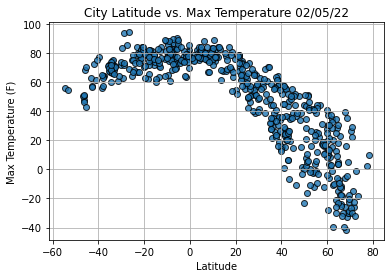

In [18]:
#Import time module
import time

#Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Citites")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

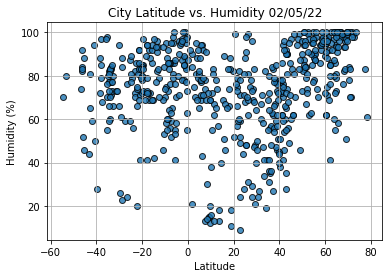

In [19]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

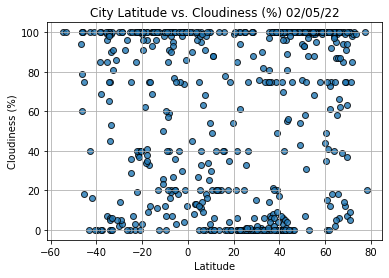

In [20]:
#Build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

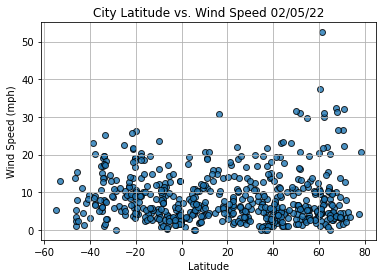

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(lats, temps, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = lats * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(lats,temps)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (F)')
    plt.show()